In [1]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [12]:
def read_logs(pattern):
    dfs = []
    for fn in glob.glob(pattern):
        m = re.match("ts-(?P<ts>\d+).run-(?P<r>\d+).nc-(?P<nc>\d+).c-(?P<c>\d+).es-(?P<es>\d+).w-(?P<w>\d+)", fn)
        if not m:
            continue
        df = pd.read_csv(fn, sep=',', header=1, names=('start', 'end'))
        df['ts'] = m.group('ts')
        df['runid'] = m.group('r')
        df['nclients'] = m.group('nc')
        df['clientid'] = m.group('c')
        df['esize'] = m.group('es')
        df['width'] = m.group('w')
        df['lat_ms'] = (df['end'] - df['start']) / 1000000.0
        dfs.append(df)
    return pd.concat(dfs)

In [22]:
df = read_logs("*.log")

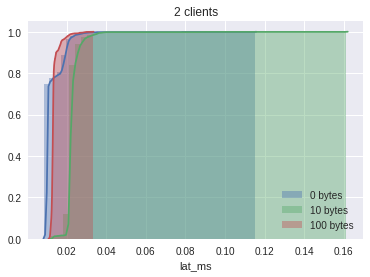

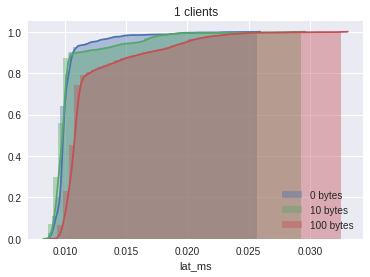

In [49]:
for nclients in df.nclients.unique():
    f, ax = plt.subplots(1, 1)
    ax.set_title("%s clients" % (nclients,))
    dfnc = df[df.nclients == nclients]
    entry_sizes = dfnc.esize.unique()
    entry_sizes.sort()
    for entry_size in entry_sizes:
        label = "%s bytes" % (entry_size,)
        dfes = dfnc[dfnc.esize == entry_size]
        sns.distplot(dfes.head(1000).lat_ms,
                     hist_kws=dict(cumulative=True),
                     kde_kws=dict(cumulative=True),
                     label=label, ax=ax)
        ax.legend()